In [1]:
from feature_selector import FeatureSelector

In [2]:
from sklearn.feature_selection import VarianceThreshold

In [3]:
import pandas as pd
import pickle as pickle
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings; warnings.simplefilter('ignore')

In [4]:
train = pd.read_pickle('../../input/features/train_features_003.pkl')

In [5]:
labels = pd.read_pickle('../../input/features/train_labels.pkl')

In [6]:
train.shape

(17690, 170)

In [7]:
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = train, labels = labels)

### Missing Values

In [8]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [9]:
fs.missing_stats.head(6)

,missing_fraction
accumulated_misses_games_diff,0.000057
accumulated_correct_attempts_diff,0.000057
Clip_eventacum_diff,0.000057
Activity_eventacum_diff,0.000057
Assessment_eventacum_diff,0.000057
Game_eventacum_diff,0.000057


In [10]:
missing_features = fs.ops['missing']
missing_features[:6]

[]

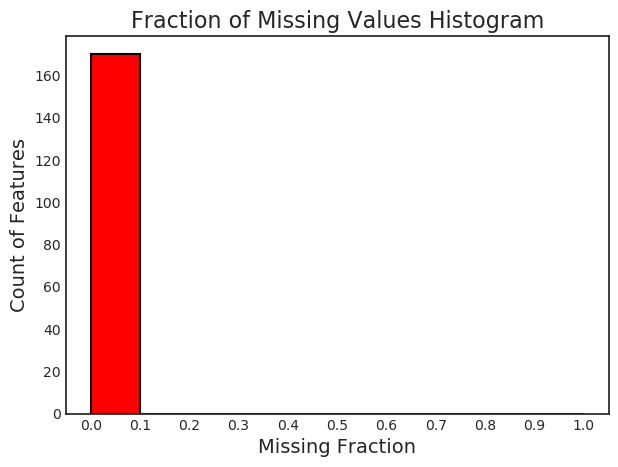

In [11]:
fs.plot_missing()

No missing values found

### Collinear Features

In [12]:
fs.identify_collinear(correlation_threshold = 0.9)

40 features with a correlation magnitude greater than 0.90.



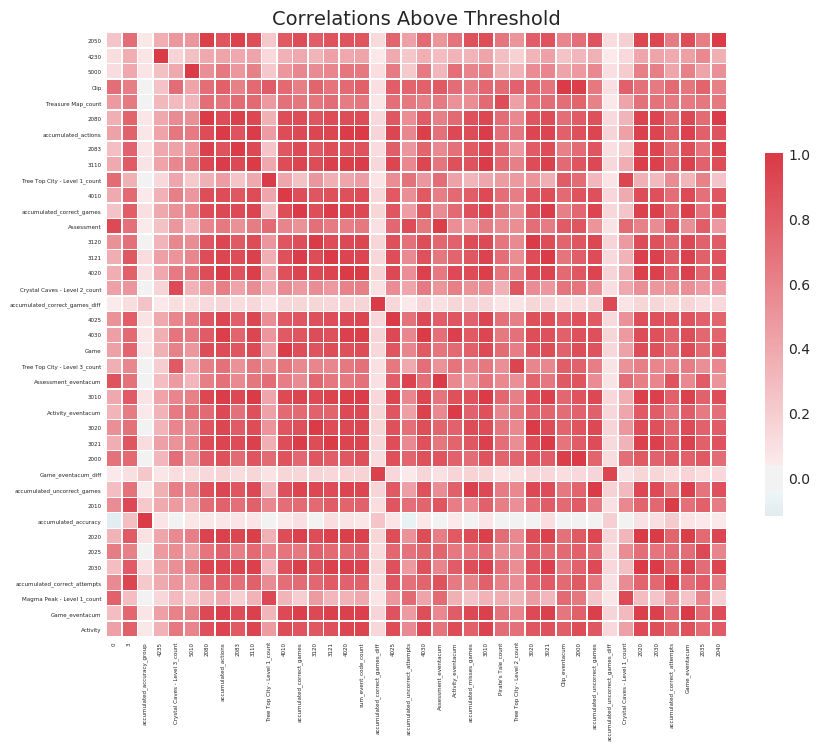

In [13]:
fs.plot_collinear()

In [14]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']# dataframe of collinear features
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,2080,2050,0.971198
1,2083,2050,0.955086
2,2083,2080,0.957627
3,3110,Activity,0.941494
4,3110,Game,0.907375
5,3110,2080,0.925328
6,3110,2083,0.914568
7,3120,3110,0.903122
8,3121,2083,0.900769
9,3121,3110,0.952454


### Single Unique Value Features

In [17]:
fs.identify_single_unique()

30 features with a single unique value.



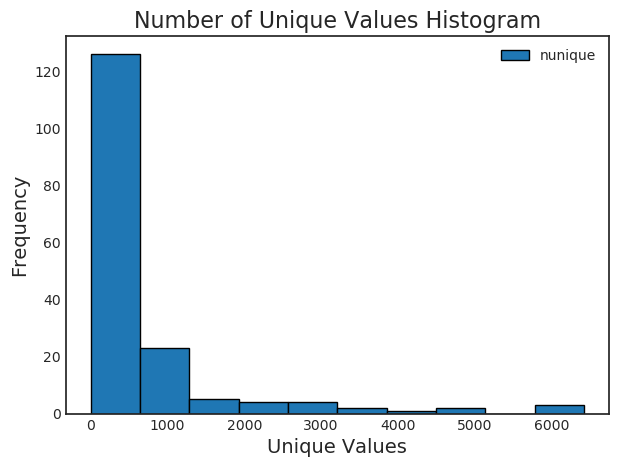

In [18]:
fs.plot_unique()

In [19]:
fs.ops['single_unique']

['Bird Measurer (Assessment)',
 'Cart Balancer (Assessment)',
 'Cauldron Filler (Assessment)',
 'Chest Sorter (Assessment)',
 'Costume Box',
 'Crystal Caves - Level 1',
 'Crystal Caves - Level 2',
 'Crystal Caves - Level 3',
 'Heavy, Heavier, Heaviest',
 'Honey Cake',
 'Lifting Heavy Things',
 'Magma Peak - Level 1',
 'Magma Peak - Level 2',
 'Mushroom Sorter (Assessment)',
 'Ordering Spheres',
 'Rulers',
 'Slop Problem',
 'Treasure Map',
 'Tree Top City - Level 1',
 'Tree Top City - Level 3',
 'Welcome to Lost Lagoon!',
 '12 Monkeys',
 'Balancing Act',
 "Pirate's Tale",
 'Tree Top City - Level 2',
 'Cart Balancer (Assessment)_count',
 'Cauldron Filler (Assessment)_count',
 'Mushroom Sorter (Assessment)_count',
 'Chest Sorter (Assessment)_count',
 'Bird Measurer (Assessment)_count']

### Removing Features

In [95]:
# methods: 'missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'
#train_removed = fs.remove(methods = 'all')

In [20]:
train_removed = fs.remove(methods = ['single_unique'])

Removed 30 features.


In [21]:
train_removed.shape

(17690, 140)

### Removing Constant features

In [22]:
constant_filter = VarianceThreshold(threshold=0)

In [24]:
constant_filter.fit(train_removed.replace([np.inf, -np.inf, np.nan],0))

VarianceThreshold(threshold=0)

In [25]:
print(len(train_removed.columns[constant_filter.get_support()]), " features are not constant")

140  features are not constant


In [26]:
constant_columns = [column for column in train_removed.columns
                    if column not in train_removed.columns[constant_filter.get_support()]]

print(len(constant_columns), " features are constant")

0  features are constant


In [27]:
print(constant_columns)

[]


### Removing Quasi-Constant Features

In [98]:
qconstant_filter = VarianceThreshold(threshold=0.01)

In [99]:
qconstant_filter.fit(train_removed)

VarianceThreshold(threshold=0.01)

In [100]:
print(len(train_removed.columns[qconstant_filter.get_support()]), " features are not quasi-constant")

89  features are not quasi-constant


In [102]:
quasiconstant_columns = [column for column in train.columns
                    if column not in train_removed.columns[qconstant_filter.get_support()]]

print(len(quasiconstant_columns), " features are quasi-constant")

68  features are quasi-constant


In [103]:
for q in quasiconstant_columns:
    print(q)

12 Monkeys
Balancing Act
Bird Measurer (Assessment)
Cart Balancer (Assessment)
Chest Sorter (Assessment)
Costume Box
Crystal Caves - Level 2
Crystal Caves - Level 3
Heavy, Heavier, Heaviest
Honey Cake
Magma Peak - Level 1
Pirate's Tale
Rulers
Slop Problem
Treasure Map
Tree Top City - Level 1
Tree Top City - Level 2
Tree Top City - Level 3
Welcome to Lost Lagoon!
Cauldron Filler (Assessment)
Crystal Caves - Level 1
Lifting Heavy Things
Magma Peak - Level 2
Mushroom Sorter (Assessment)
Ordering Spheres
2080
2083
3110
3120
3121
4235
5010
4010
4020
4025
4030
3010
3020
3021
2000
2020
2030
2035
2040
Bird Measurer (Assessment)_count
Cart Balancer (Assessment)_count
Chest Sorter (Assessment)_count
Tree Top City - Level 1_count
Pirate's Tale_count
Tree Top City - Level 3_count
Crystal Caves - Level 2_count
Mushroom Sorter (Assessment)_count
Crystal Caves - Level 1_count
Cauldron Filler (Assessment)_count
Clip_eventacum
Activity_eventacum
Assessment_eventacum
Game_eventacum
accumulated_correct_a

### Removing Duplicate Features

In [28]:
train_features_T = train_removed.T
train_features_T.shape

(140, 17690)

In [29]:
print("Number of features duplicate", train_features_T.duplicated().sum())

Number of features duplicate 2


In [30]:
unique_features = train_features_T.drop_duplicates(keep='first').T.columns.tolist()

In [34]:
unique_features[:5]

['Activity',
 'Air Show',
 'All Star Sorting',
 'Assessment',
 'Bottle Filler (Activity)']

In [35]:
train_removed = train_removed[unique_features]


### Zero Importance Features

In [111]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model



LightGBMError: Multiclass objective and metrics don't match

In [67]:
zero_importance_features

['motivo_contacto_cod',
 'diff_dtalta_dtcertinicio',
 'diff_dt_alta_compra',
 'prestacion_reemplazo_bool',
 'prestacion_indemnizacion_bool',
 'cobertura_dano_accidental_bool',
 'diff_dt_certemit_compra']

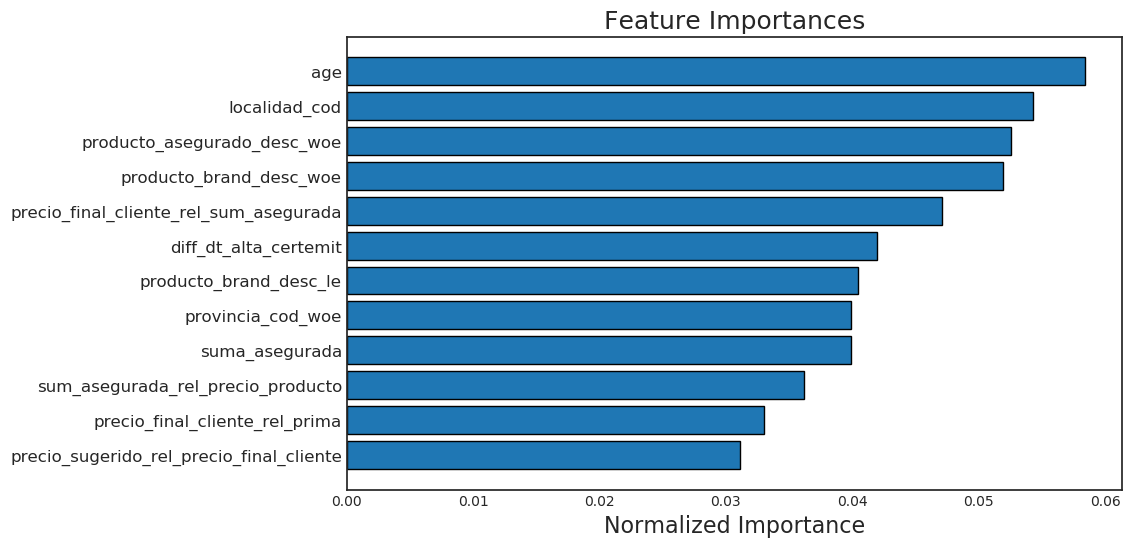

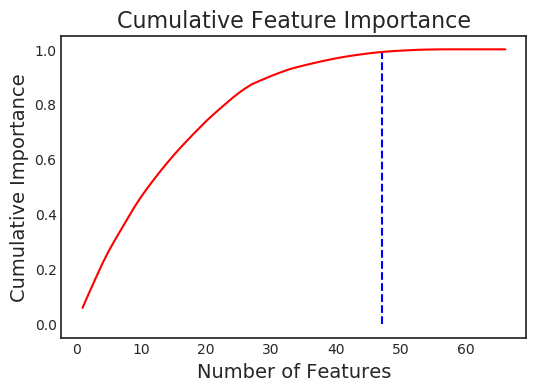

47 features required for 0.99 of cumulative importance


In [70]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [114]:
np.save('data/features/features_selected_002.npy',train_removed.columns.tolist())